In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xarray
import glob
import matplotlib.colors as colors
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import palettable
from palettable.colorbrewer.sequential import YlOrRd_9,RdPu_9
from palettable.colorbrewer.diverging import RdYlGn_10_r

### Land use info

In [2]:
path = '/jet/home/xjliu/Amazon_exp/'
with xarray.open_dataset(path+'Tanguro201401/wrfout_d01_2014-01-01_00:00:00',decode_times=True,
                         mask_and_scale='True') as ds:
    lats = ds['XLAT'][0,:,:]
    lons = ds['XLONG'][0,:,:]   

ValueError: did not find a match in any of xarray's currently installed IO backends ['netcdf4', 'scipy']. Consider explicitly selecting one of the installed backends via the ``engine`` parameter to xarray.open_dataset(), or installing additional IO dependencies:
http://xarray.pydata.org/en/stable/getting-started-guide/installing.html
http://xarray.pydata.org/en/stable/user-guide/io.html

## TSK at noon. Keep the diurnal cycle
#### Average between day 5-day 30

In [13]:
### OBS land use
path = '/jet/home/xjliu/Amazon_exp/'
files = sorted(glob.glob(path+'Tanguro201401/3Dfields_d01_2014-01-*00:00:00'))
with xarray.open_dataset(files[10],decode_times=True,
                         mask_and_scale='True') as ds:
    TSK_obs = ds['TSK']

for filename in files[11:21]:
    with xarray.open_dataset(filename,decode_times=True,
                         mask_and_scale='True') as ds:
        TSK_obs = xarray.concat([TSK_obs,ds['TSK']],dim='Day')
        

### All trees
files = sorted(glob.glob(path+'Tanguro201401_alltrees/3Dfields_d01_2014-01-*00:00:00'))
with xarray.open_dataset(files[5],decode_times=True,
                         mask_and_scale='True') as ds:
    TSK_alltrees = ds['TSK']
    

for filename in files[6:21]:
    with xarray.open_dataset(filename,decode_times=True,
                         mask_and_scale='True') as ds:
        TSK_alltrees = xarray.concat([TSK_alltrees,ds['TSK']],dim='Day')

### No trees
files = sorted(glob.glob(path+'Tanguro201401_notrees/3Dfields_d01_2014-01-*00:00:00'))
with xarray.open_dataset(files[5],decode_times=True,
                         mask_and_scale='True') as ds:
    TSK_notrees = ds['TSK']
    

for filename in files[6:21]:
    with xarray.open_dataset(filename,decode_times=True,
                         mask_and_scale='True') as ds:
        TSK_notrees = xarray.concat([TSK_notrees,ds['TSK']],dim='Day')

TSK_obs = TSK_obs - 273.15
TSK_alltrees = TSK_alltrees -273.15
TSK_notrees = TSK_notrees -273.15

TSK_obs_mean = TSK_obs.mean('Day')
TSK_alltrees_mean = TSK_alltrees.mean('Day')
TSK_notrees_mean = TSK_notrees.mean('Day')

### Diurnal cycle

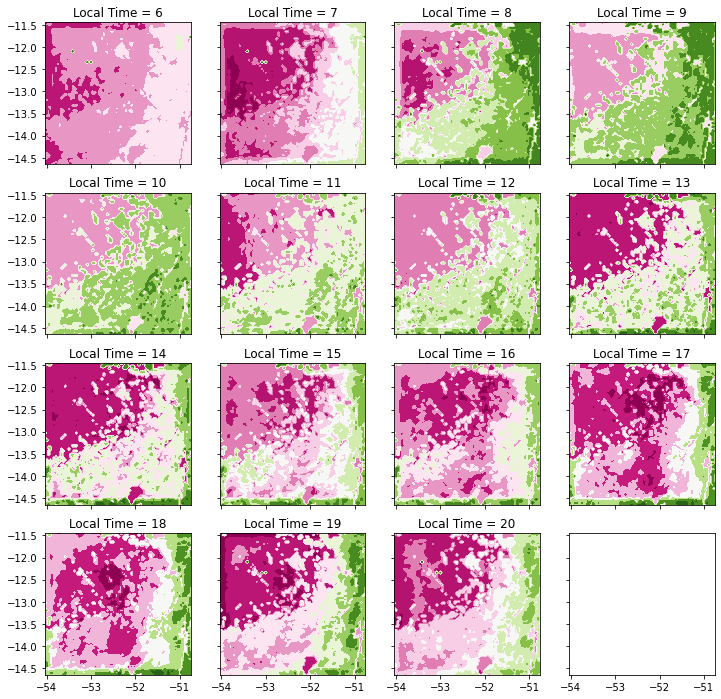

In [7]:
fig,axes = plt.subplots(4,4,figsize=(12,12),sharex=True,sharey=True)
axes = axes.ravel()
for ii in np.arange(9,24):
    axes[ii-9].contourf(lons,lats,TSK_obs_mean[ii,:,:],
            cmap='PiYG', extend='both')
            #levels=np.linspace(0,400,11))
    axes[ii-9].set_title('Local Time = '+str(ii-3))
#plt.colorbar()

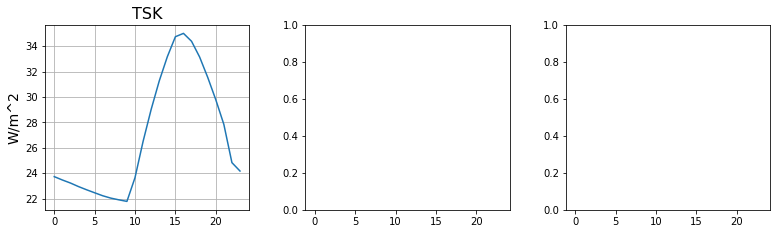

In [15]:
TSK_obs_mean_ave = TSK_obs_mean.mean(('west_east','south_north'))

fig,axes = plt.subplots(1,3,figsize=(13,3.4),sharex=True)
fig.subplots_adjust(wspace=0.275)
axes = axes.ravel()

units=['W/m^2','W/m^2','m']
for ii,varname in enumerate(['TSK']):
    var = varname+'_obs_mean_ave'
    axes[ii].plot(TSK_obs_mean_ave.Time,locals()[var])
    axes[ii].set_title(varname,fontsize=16)
    axes[ii].set_ylabel(units[ii],fontsize=14)
    axes[ii].grid()


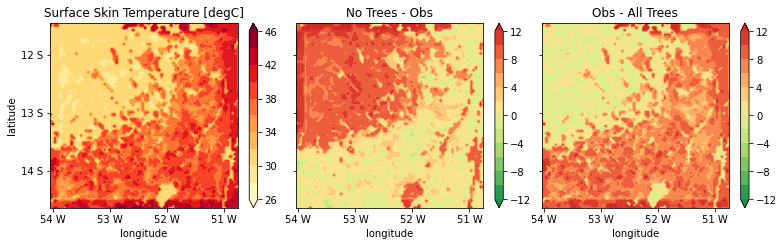

In [60]:
fig,axes = plt.subplots(1,3,figsize=(13,3.4),sharex=True,sharey=True)
fig.subplots_adjust(wspace=0.05)
axes = axes.ravel()

import palettable
from palettable.colorbrewer.sequential import YlOrRd_9
from palettable.colorbrewer.diverging import RdYlGn_10_r


cmap_old = cm.get_cmap(RdYlGn_10_r.mpl_colormap, 56)
#cmap_old = cm.get_cmap('PiYG_r', 256)

newcolors = cmap_old(np.linspace(0.1, 0.9, 256))
newcmp = ListedColormap(newcolors)

norm = colors.TwoSlopeNorm(vmin=-200.,vcenter=0., vmax=20)

localT = 13
varname = 'TSK'
im0 = axes[0].contourf(lons,lats,locals()[varname+'_obs_mean'][localT+3,:,:],
                levels=np.linspace(26,46,11),
                    extend='both',
                 cmap=YlOrRd_9.mpl_colormap)
im1 = axes[1].contourf(lons,lats,locals()[varname+'_notrees_mean'][localT+3,:,:]-locals()[varname+'_obs_mean'][localT+3,:,:],
                levels=np.linspace(-12,12,13),
                 extend='both',
                       #norm=norm, 
                       cmap=newcmp)
im2 = axes[2].contourf(lons,lats,locals()[varname+'_obs_mean'][localT+3,:,:]-locals()[varname+'_alltrees_mean'][localT+3,:,:],
                levels=np.linspace(-12,12,13),
                       #norm = norm,
                extend='both',
                 cmap=newcmp)

fig.colorbar(im0,ax=axes[0])
fig.colorbar(im1,ax=axes[1])
fig.colorbar(im2,ax=axes[2])

titles=['Surface Skin Temperature [degC]','No Trees - Obs','Obs - All Trees']
for ii in range(3):
    axes[ii].set_title(titles[ii])
    axes[0].set_ylabel('latitude')
    axes[ii].set_xlabel('longitude')
    axes[ii].set_xticks(np.arange(-54,-50,1))
    axes[ii].set_xticklabels(['54 W','53 W','52 W','51 W'])
    axes[ii].set_yticks(np.arange(-14,-11,1))
    axes[ii].set_yticklabels(['14 S','13 S','12 S'])

fig.savefig('plot_TSK_Jan.png',format='png',dpi=400,bbox_inches='tight')
